1-) Considere o problema das espirais. Sendo a espiral 1 uma classe e a espiral 2 outra
classe. Gere os dados usando as seguintes equações:
- Espiral 1:

  $x = \frac{\theta}{4}cos(\theta), ~y = \frac{\theta}{4}sen(\theta), ~\theta \geq 0$

- Espiral 2:

  $x = (\frac{\theta}{4} + 0.8)cos(\theta), ~y = (\frac{\theta}{4} + 0.8)sen(\theta), ~\theta \geq 0$

fazendo theta assumir 1000 valores igualmente espaçados entre 0 e 20 radianos. Solucione
este problema considerando:

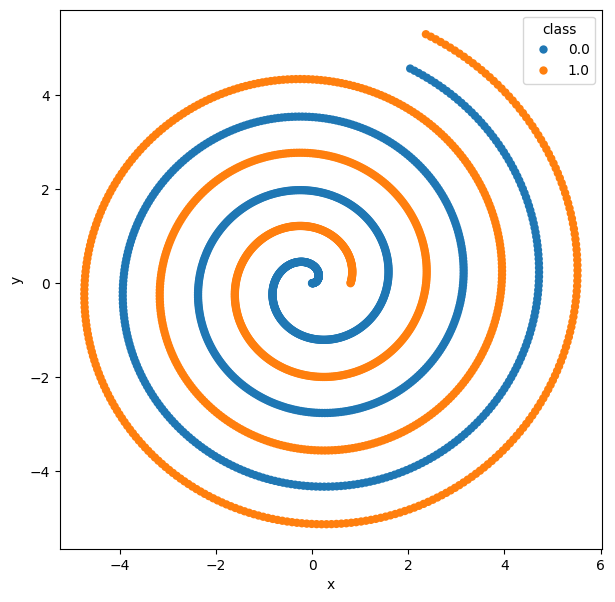

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Função para gerar os dados das espirais
def generate_spiral_data(num_points):
    theta = np.linspace(0, 20, num_points)

    x0 = (theta / 4) * np.cos(theta)
    y0 = (theta / 4) * np.sin(theta)

    x1 = ((theta / 4) + 0.8) * np.cos(theta)
    y1 = ((theta / 4) + 0.8) * np.sin(theta)

    x = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1])
    classes = np.concatenate([np.zeros(len(x0)), np.ones(len(x1))])

    data = pd.DataFrame({
        "x": x,
        "y": y,
        "class": classes
    })

    return data

# Gerar dados das espirais
data = generate_spiral_data(1000)

# Plotar os dados
plt.figure(figsize=(7, 7))
sns.scatterplot(data=data, x="x", y="y", hue="class", sizes=1, linewidth=0)
plt.show()

## a) Uma SVM

In [12]:
# Separar os dados em features (X) e labels (y)
X = data[['x', 'y']].values
y = data['class'].values

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = svm_model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do SVM:", accuracy)

Acurácia do SVM: 0.585


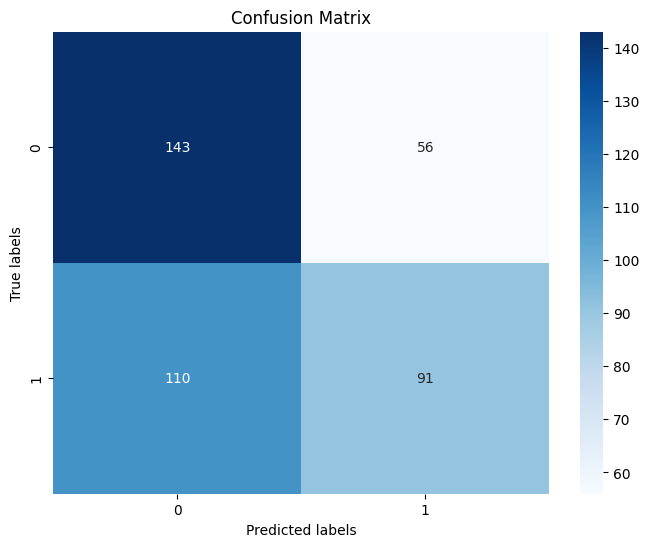

In [13]:
# Plotar a matriz de confusão com seaborn
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

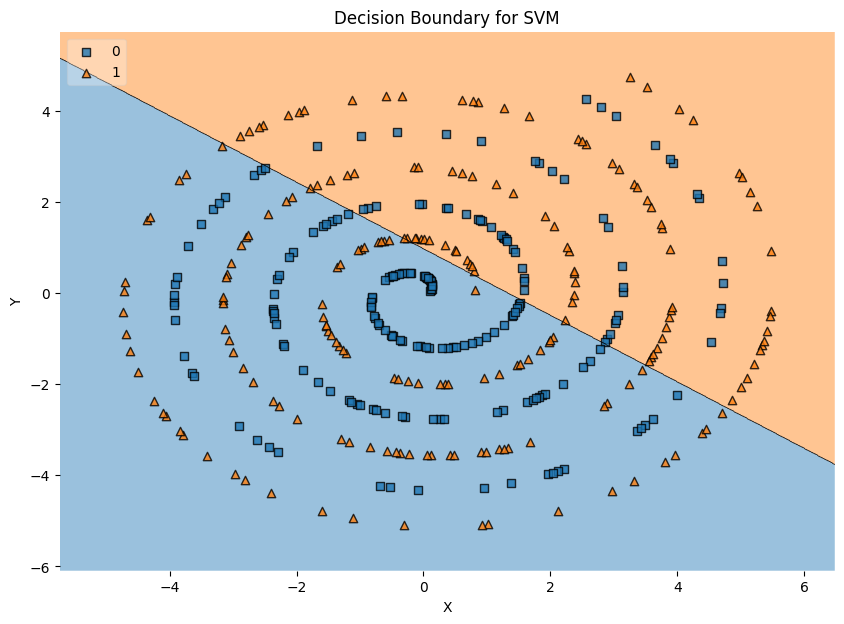

In [14]:
# Plotar as regiões de decisão
plt.figure(figsize=(10, 7))
plot_decision_regions(X_test, y_test.astype(np.int_), clf=svm_model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary for SVM')
plt.show()

## b) Um comitê de máquina formado por uma rede perceptron de uma camada oculta, uma RBF e uma máquina de vetor de suporte (SVM)


In [16]:
# Separar os dados em features (X) e labels (y)
X = data[['x', 'y']].values
y = data['class'].values

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os classificadores individuais
svm_clf = SVC(kernel='linear', probability=True)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
# Como não foi especificada a configuração da RBF, vamos usar uma SVC com kernel RBF
rbf_clf = SVC(kernel='rbf', probability=True)

# Criar o comitê de máquinas
voting_clf = VotingClassifier(
    estimators=[('svm', svm_clf), ('mlp', mlp_clf), ('rbf', rbf_clf)],
    voting='soft'  # Usar votação por probabilidade
)

# Treinar o comitê de máquinas
voting_clf.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = voting_clf.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do Comitê de Máquinas:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do Comitê de Máquinas: 0.66


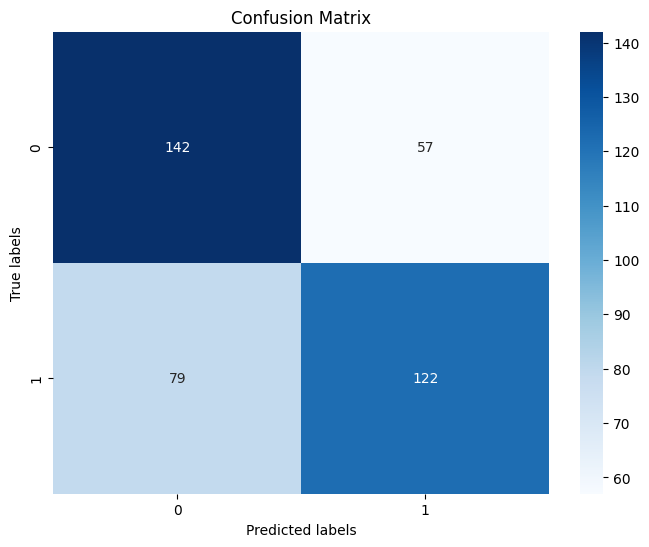

In [17]:
# Plotar a matriz de confusão com seaborn
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

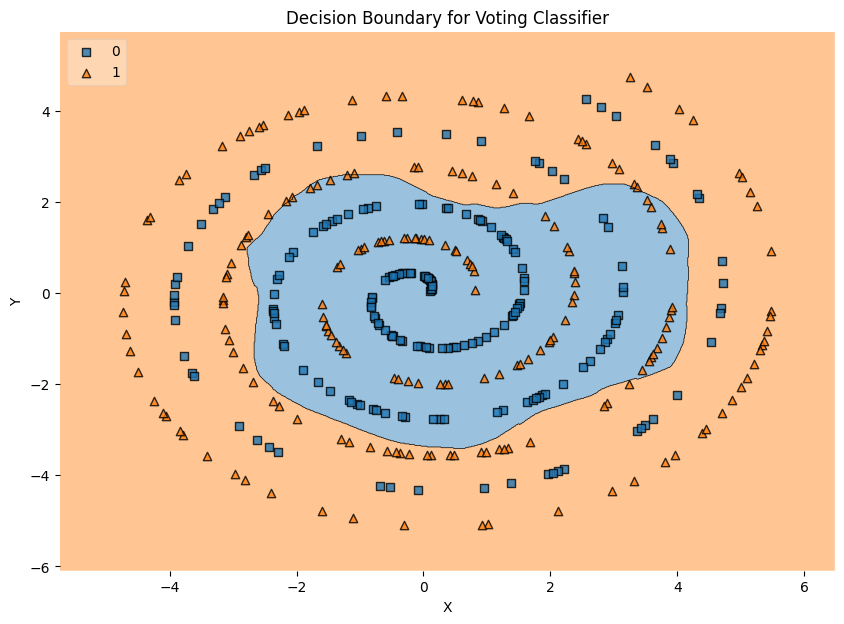

In [18]:
# Plotar as regiões de decisão
plt.figure(figsize=(10, 7))
plot_decision_regions(X_test, y_test.astype(np.int_), clf=voting_clf, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary for Voting Classifier')
plt.show()